# Rio de Janeiro metropolitan area

Analysis of the metropolitan area of the Rio de Janeiro.

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [2]:
tables = pd.read_html('https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_do_Rio_de_Janeiro')
tables[6] = tables[6].set_index('Município de residência')
tables[7] = tables[7].set_index('Município de residência')
table = pd.concat([tables[6], tables[7]], axis=1)
adjacency = table.to_numpy()
func = lambda v: float(v.replace('%', '').replace(',','.'))/100
func = np.vectorize(func)
adjacency = func(adjacency)
table = pd.DataFrame(adjacency, index=table.index, columns=table.index)
populations = tables[33].set_index('Município[260]')['População[247]Estimativa 2021']
areas = tables[33].set_index('Município[260]')['Área territorial (km²)[261]']

populations = populations.apply(lambda x: float(x.replace('\xa0', '')))
populations.drop(['Cachoeiras de Macacu*', 'Petrópolis*', 'Rio Bonito*', 'Total'], inplace=True)
populations.index = populations.index.str.replace('*', '', regex=False)

areas = areas.apply(lambda x: x.replace('\xa0', ''))
areas = areas.apply(lambda x: float(x.replace(',', '')))/1000
areas.drop(['Cachoeiras de Macacu*', 'Petrópolis*', 'Rio Bonito*', 'Total'], inplace=True)
areas.index = areas.index.str.replace('*', '', regex=False)

In [3]:
table.to_csv('../data/rio_de_janeiro_transition_matrix.csv')
populations.to_csv('../data/rio_de_janeiro_population.csv')
areas.to_csv('../data/rio_de_janeiro_area.csv')

In [4]:
G = nx.from_pandas_adjacency(table, create_using=nx.DiGraph)

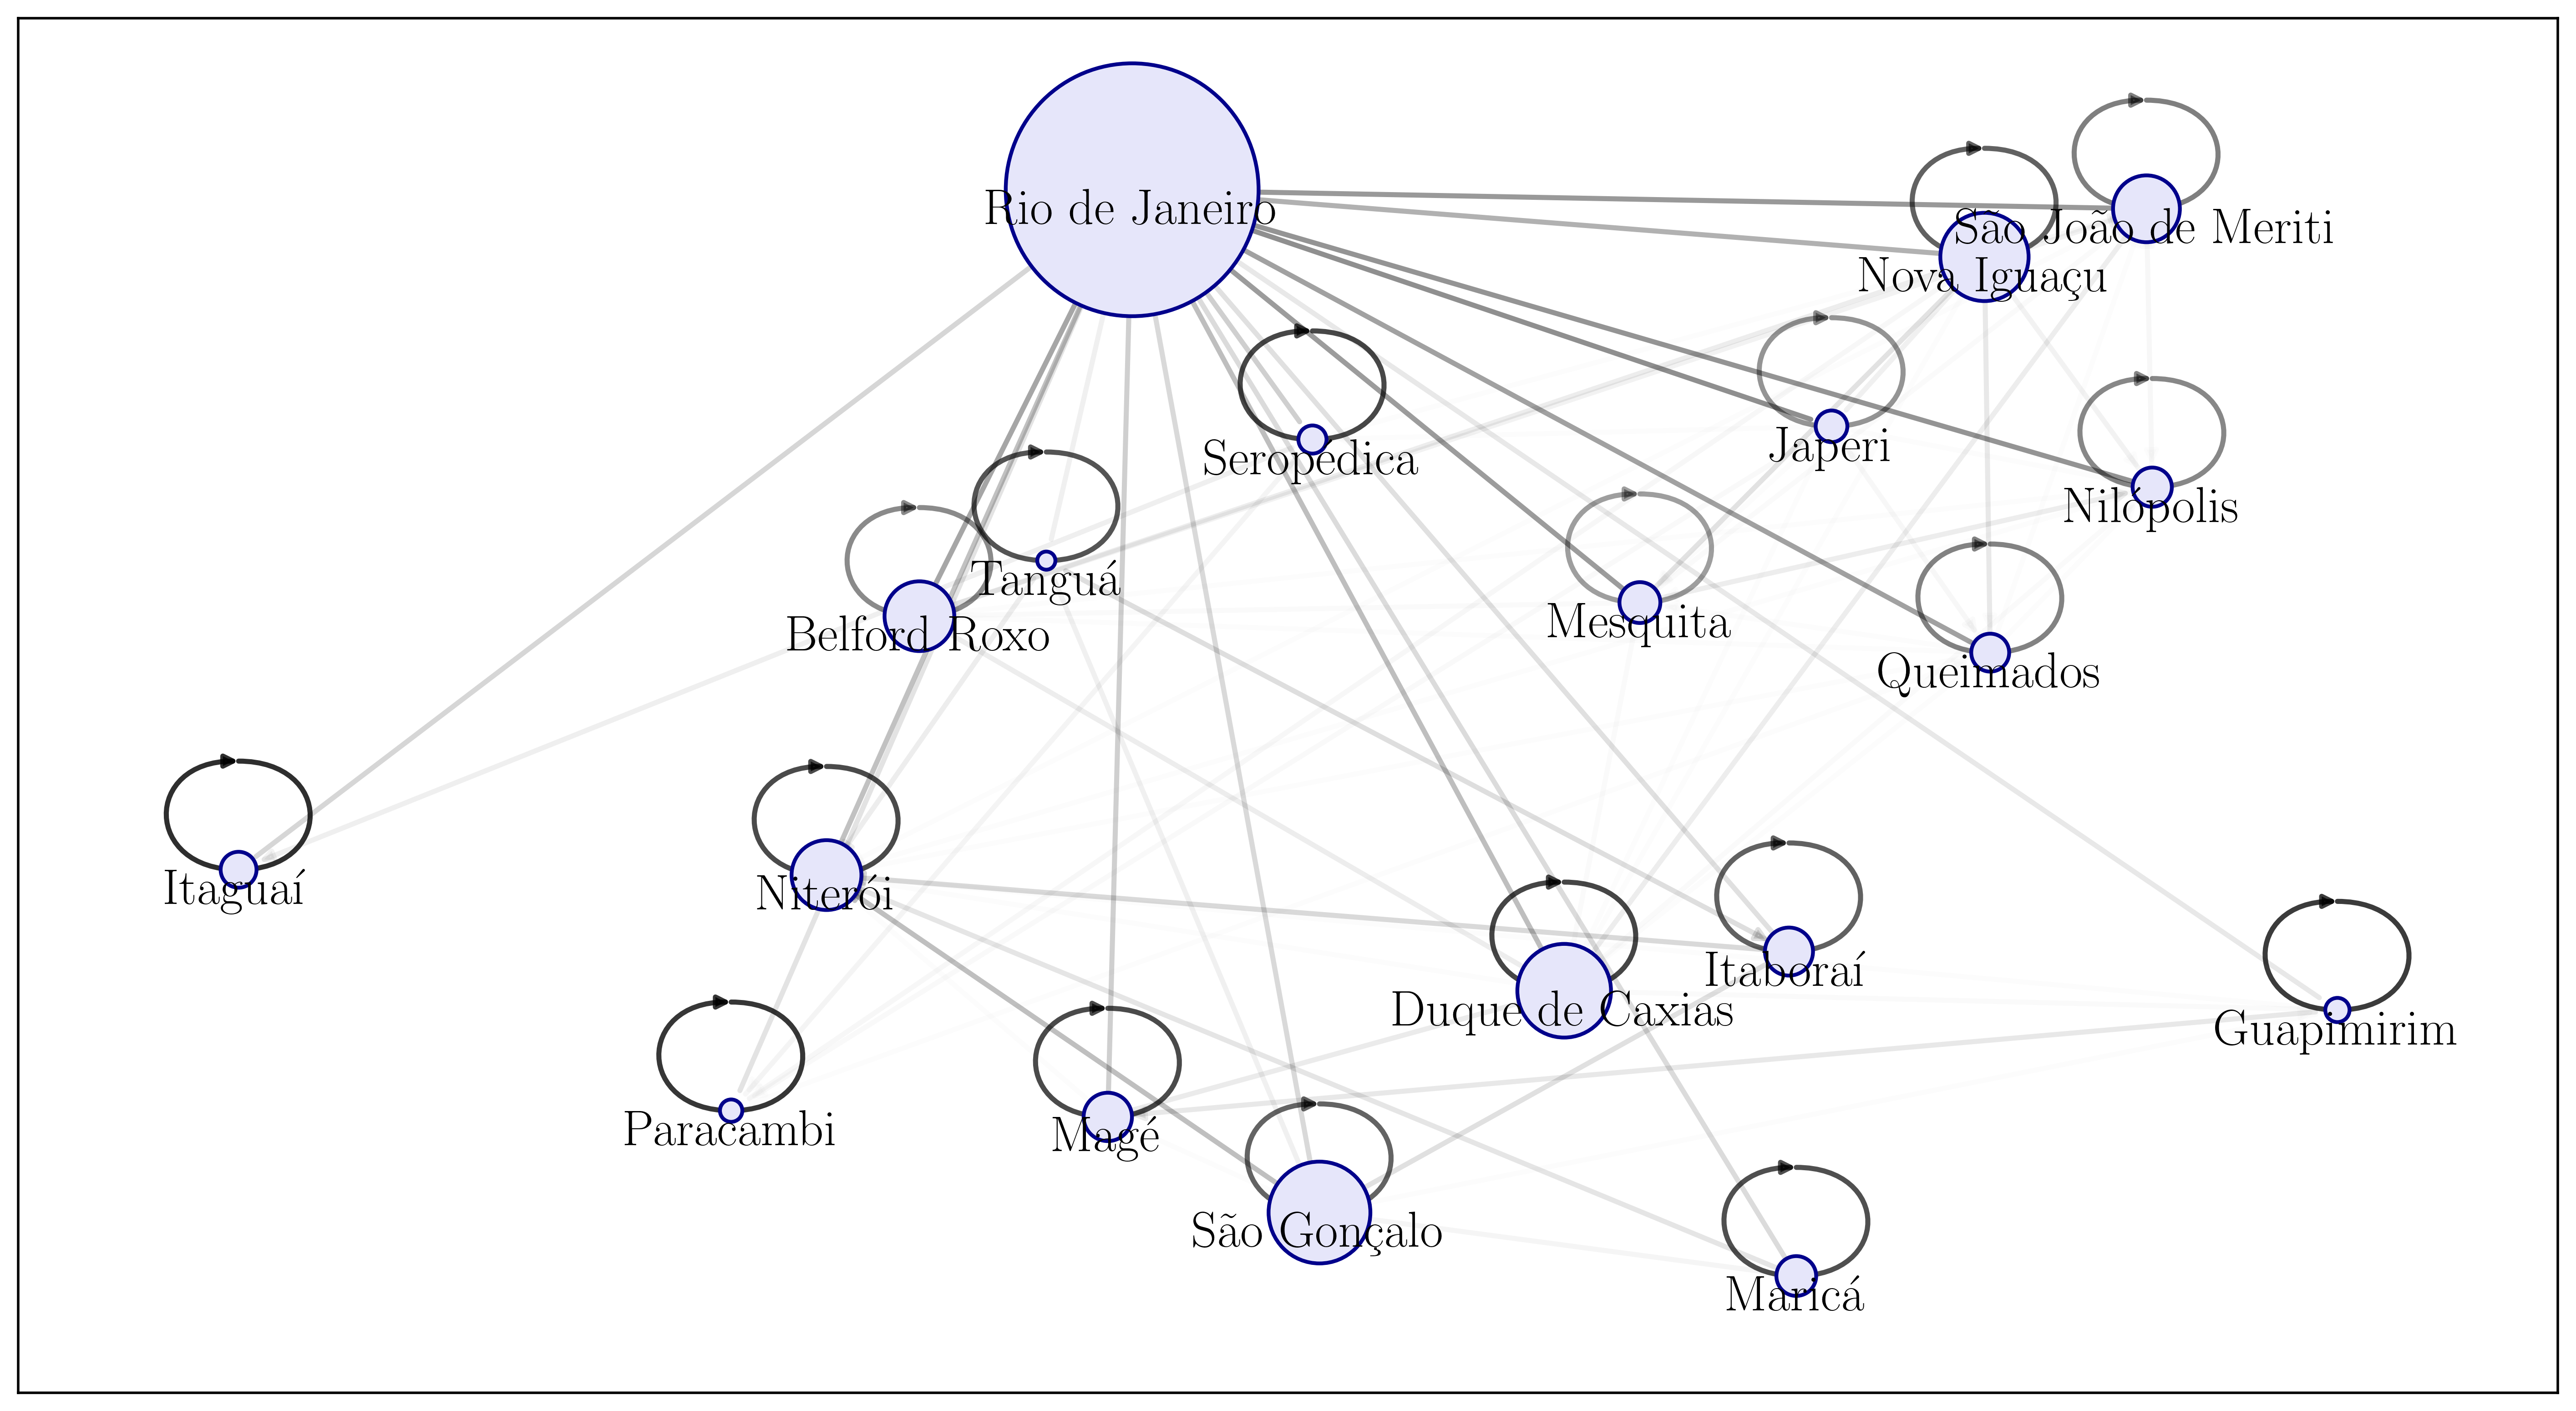

In [17]:
fig, ax = plt.subplots(figsize=(18,10))
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u,v in G.edges]
nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=weights, edge_color='black', width=2)
nx.draw_networkx_nodes(G, pos=pos, ax=ax,
                       node_size=10000*populations.loc[list(G.nodes)]/max(populations.loc[list(G.nodes)]),
                       node_color='lavender',
                       node_shape='o',
                       edgecolors='darkblue',
                       linewidths=1.5)
nx.draw_networkx_labels(G, pos=pos, ax=ax, verticalalignment='top', horizontalalignment='center',
                        font_family='serif', clip_on=False, font_size=20)
plt.savefig('../images/metropolitan_region_rio.pdf', bbox_inches='tight')
plt.show()

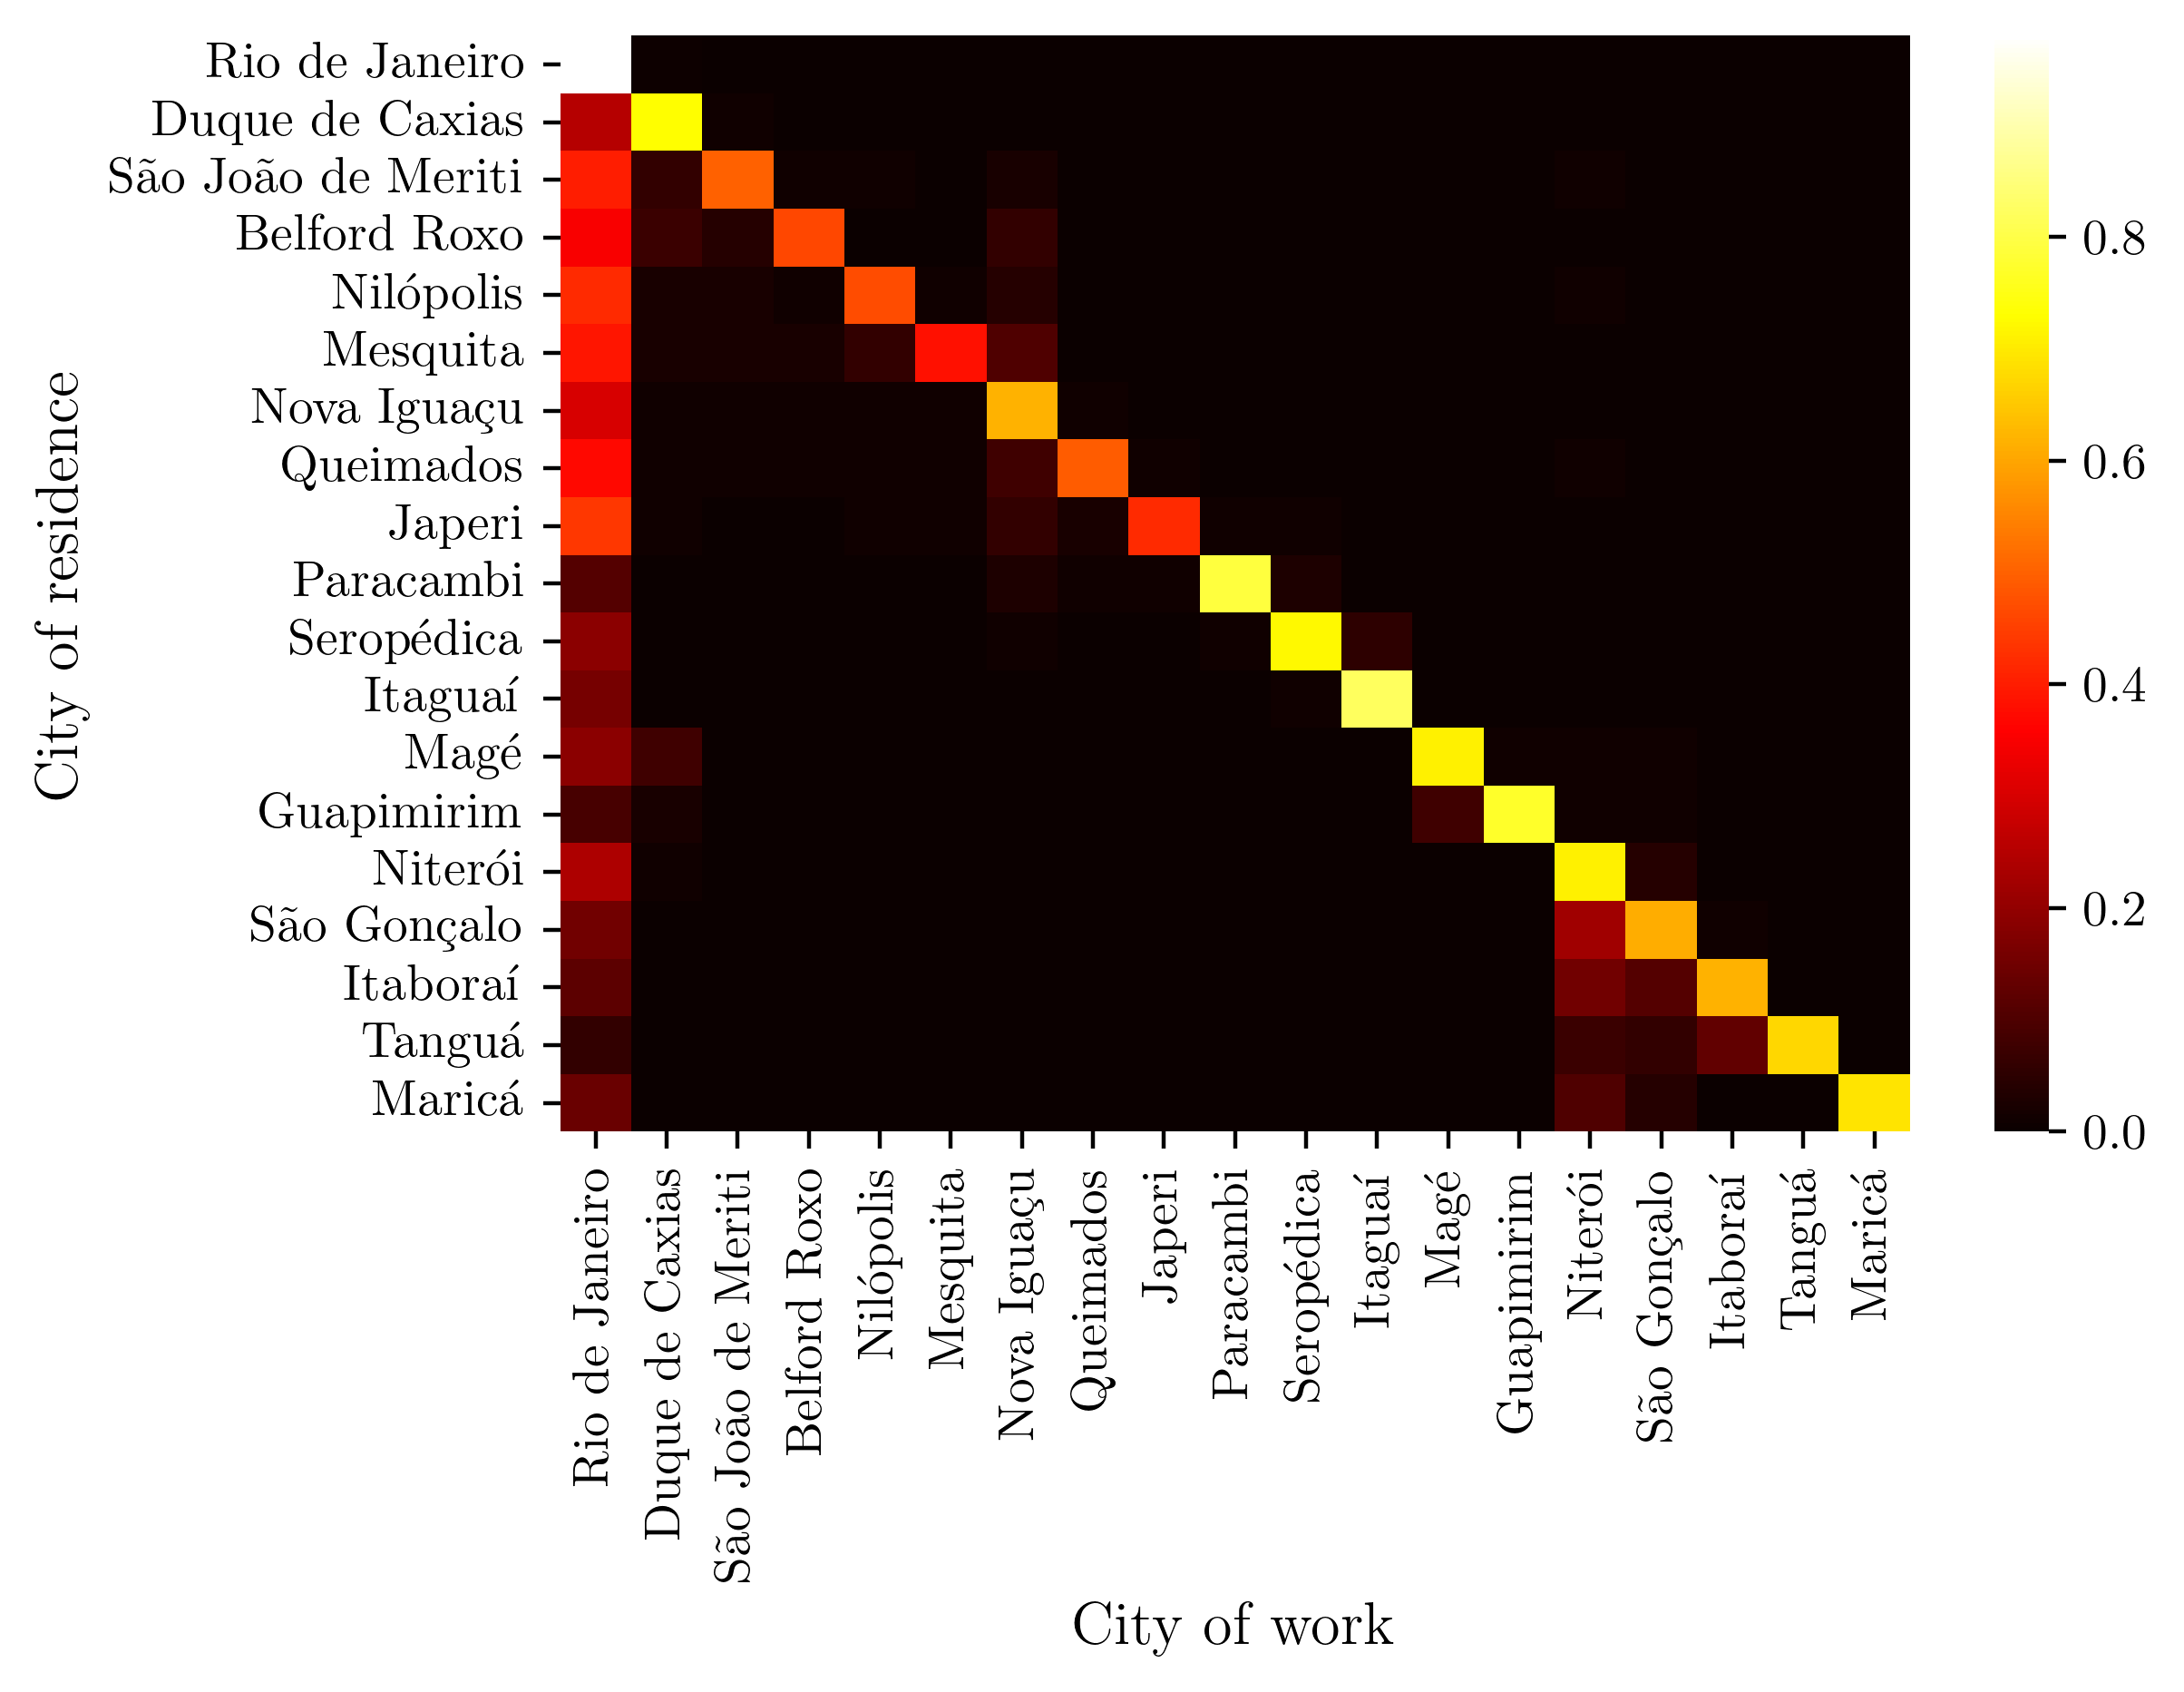

In [9]:
sns.heatmap(table, cmap='hot')
plt.savefig('../images/heatmap.png', bbox_inches='tight')
plt.xlabel('City of work')
plt.ylabel('City of residence')
plt.savefig('../images/rio_de_janeiro_pmatrix.pdf', bbox_inches='tight')
plt.show()